In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from networkx import DiGraph

from graphviz import Source,Digraph

from matplotlib.patches import FancyArrowPatch, Circle, Ellipse

In [2]:
# from ProcessGenerator import FeatureGenerator, SimpleProcessMaker

# stages = np.array(['A', 'B', 'C', 'D', 'E', 'F'])
# probas=np.array([0.1, 0.8, 0.7, 0.5, 0.5, 0.3])
# maker = SimpleProcessMaker(stages=stages, probas=probas)

# gen_df = pd.DataFrame()
# for idx in range(250000):
#     d = maker.make_process_sample(idx)
#     gen_df = gen_df.append(d)
    
# gen = FeatureGenerator()
# num_users = 5
# gen_df['user'] = ['user_' + gen.label_features(label_type='string', nb_unique_labels=num_users)[0][-1] for _ in range(len(gen_df))]
# gen_df.head()

In [3]:
# gen_df.to_csv("old/500k.csv")

In [4]:
gen_df = pd.read_csv("old/500k.csv")


In [5]:
gen_df = gen_df.append(gen_df)

In [6]:
# gen_df = pd.read_csv('old/3k.csv')

In [7]:
gen_df.shape

(1191858, 5)

### Graphviz


In [8]:
class RuleFinder():
    def __init__(self, df, id_col, stage_col, feature_cols):
        self.df = df
        self.id_col = id_col
        self.stage_col = stage_col
        self.feature_cols = feature_cols
        self.graph = None
        
    # creating graph with stages as nodes and ways as edges
    def create_graph(self):
        stages = self.df[self.stage_col].unique()
        graph = Digraph(comment='Process', format = 'pdf')
        for stage in stages:
            graph.node(str(stage))
        self.df['from'] = self.df.groupby([self.id_col])[self.stage_col].shift(1)
        edges = self.df.loc[:, ['from', self.stage_col]].drop_duplicates().dropna().values
        edges = [list(map(str, edge)) for edge in edges]
        graph.edges(edges)
        self.graph = graph
        return graph
    
    def create_graph_nx(self):
        stages = self.df[self.stage_col].unique()
        graph = DiGraph()
        for stage in stages:
            graph.add_node(str(stage))
        self.df['from'] = self.df.groupby([self.id_col])[self.stage_col].shift(1)
        edges = self.df.loc[:, ['from', self.stage_col]].drop_duplicates().dropna().values
        edges = [list(map(str, edge)) for edge in edges]
        graph.add_edges_from(edges)
        self.graph = graph
        nx.draw(graph)
    
    
    

CPU times: user 488 ms, sys: 23.8 ms, total: 511 ms
Wall time: 298 ms


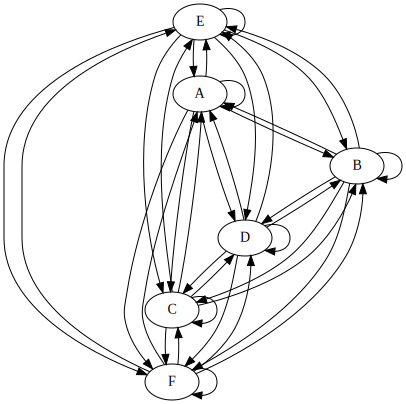

In [9]:
%%time
F = RuleFinder(gen_df, 'id', 'stages', ['dt'])
F.create_graph()

CPU times: user 318 ms, sys: 20.1 ms, total: 338 ms
Wall time: 338 ms


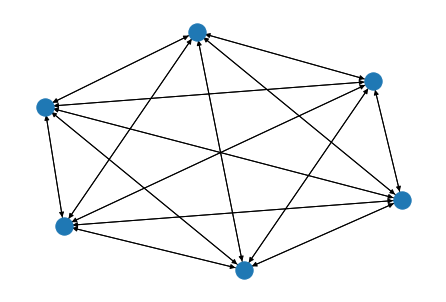

In [10]:
%%time
F = RuleFinder(gen_df, 'id', 'stages', ['dt'])
g = F.create_graph_nx()

In [17]:
res = pd.DataFrame(columns=['NetworkX', 'Graphviz'], index=['300 lines', '3 000 lines', '30 000 lines', '300 000 lines', '1 000 000 lines'])

In [18]:
res.iloc[0,0] = '102ms'
res.iloc[0,1] = '9ms'
res.iloc[1,0] = '156ms'
res.iloc[1,1] = '12ms'
res.iloc[2,0] = '180ms'
res.iloc[2,1] = '50ms'
res.iloc[3,0] = '183ms'
res.iloc[3,1] = '210ms'
res.iloc[4,0] = '338ms'
res.iloc[4,1] = '300ms'

In [19]:
res

,NetworkX,Graphviz
300 lines,102ms,9ms
3 000 lines,156ms,12ms
30 000 lines,180ms,50ms
300 000 lines,183ms,210ms
1 000 000 lines,338ms,300ms
